# **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

# **Loading Iris Dataset**

In [2]:
iris = datasets.load_iris()
#Iris data set Characteristics
print(iris.DESCR)
#Convert to DataFrame
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=columns)
#Convert targets from 0, 1, 2 to 'setosa', 'versicolor', 'virginica'
mapping = {0:'setosa', 1:'versicolor', 2:'virginica'}
df["target"]=df["target"].map(mapping)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# **Data Preprocessing**



In [3]:
#first three rows in the DataFrame
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
#type of each attribute
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

In [5]:
#dimensionality of the DataFrame
df.shape

(150, 5)

In [6]:
#description of the data in the DataFrame
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**missing values**

The results show that the iris data set has no missing value.

In [7]:
#number of missing values in the DataFrame
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

 **Duplicate Data**

 The results show that the iris data set has one duplicate data.

> in this dataset we remove the duplicate data. 



In [8]:
#number of duplicate data in the DataFrame
df.duplicated().sum()  #1
df.index[df.duplicated()] #142
#removing duplicate data from the Dataframe
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Visualizing the Pre-Processed Data**

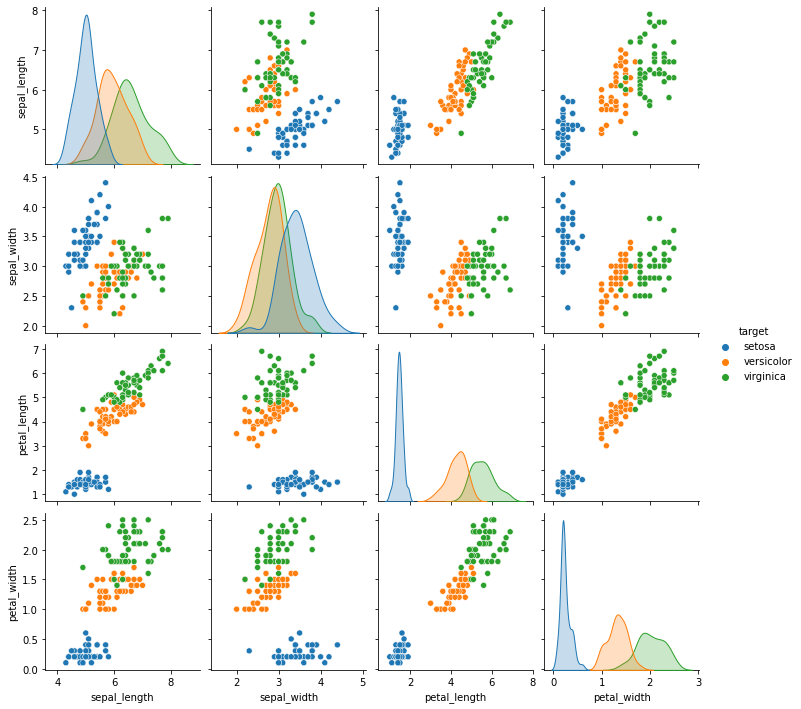

In [9]:
sns.pairplot(df, hue="target")

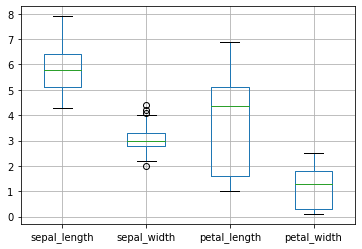

In [10]:
#boxplot
df.boxplot()

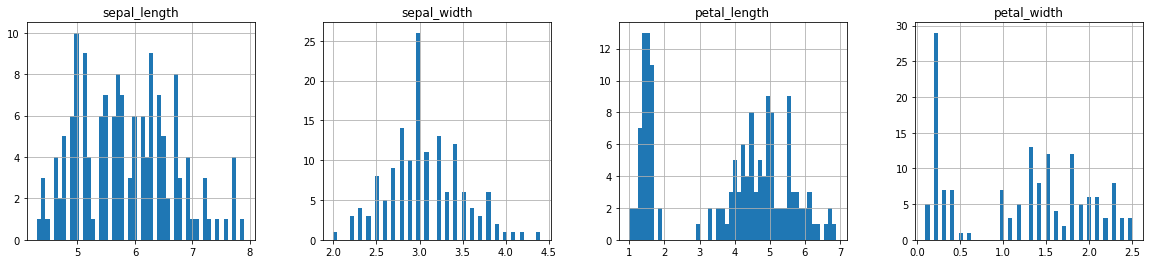

In [11]:
#Histogram
df.hist(bins=50, layout=(1,4), figsize=(20, 4))
plt.show()

# **Classification**

**Spliting the Dataset**

In [12]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :4]
y = df.iloc[:, 4] #labels
# Split data into the training sets and the testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=45)
print(x_train.shape) #(127, 4)
print(x_test.shape) #(23, 4)

(127, 4)
(23, 4)


**Model1 : DecisionTree**

In [13]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [14]:
from sklearn.metrics import *
#summery of model
print(classification_report(y_test, y_pred))
#accuracy
accuracy=accuracy_score(y_pred,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         3
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

100.0


**Model2 : Svm**

In [17]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)
y_pred=model2.predict(x_test)

In [18]:
#summery of model
print(classification_report(y_test, y_pred))
#accuracy
accuracy=accuracy_score(y_pred,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.75      1.00      0.86         3
   virginica       1.00      0.91      0.95        11

    accuracy                           0.96        23
   macro avg       0.92      0.97      0.94        23
weighted avg       0.97      0.96      0.96        23

95.65217391304348
